In [2]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel('customer_retention_dataset.xlsx')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

# EDA

HERE WE ANALYSING THE DATA BY ANALYSING ITS SHAPE STRUCTURE COLUMNS DATATYPES ETC

In [6]:
df.head

<bound method NDFrame.head of     1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                  

In [7]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [8]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [9]:
df.shape

(269, 71)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

DATASET CONSIST OF 269 ROWS AND 71 COLUMNS ,MOSTLY IN OBJECT DATATYPES

In [11]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

IN DATASET THERE IS NO NULL VARIABLES

<AxesSubplot:>

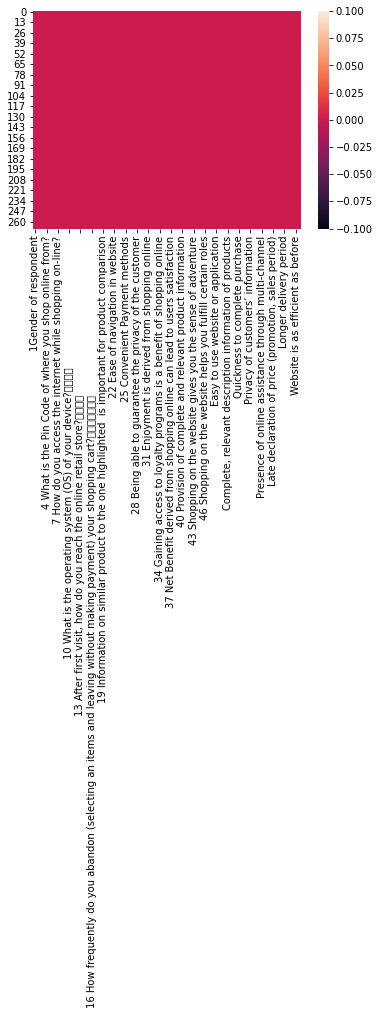

In [12]:
sns.heatmap(df.isnull())

FROM ABOVE HEATMAP IT IS CLEAR THAT NULL VARIABLE IS ABSENT IN Dataset

DUE TO HUGE VALUES OF COLUMNS WE WANT TO REDUCE SOME UNWANTED COLUMNS,FOR THAT WE WANT TO SEPARATE OUR TARGET VARIABLE 

# ANALYSING:TARGET-Which of the Indian online retailer would you recommend to a friend?

In [13]:
df['Which of the Indian online retailer would you recommend to a friend?'].unique()

array(['Flipkart.com', 'Amazon.in, Myntra.com',
       'Amazon.in, Paytm.com, Myntra.com', 'Amazon.in, Flipkart.com',
       'Amazon.in, Paytm.com',
       'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com', 'Amazon.in',
       'Amazon.in, Flipkart.com, Myntra.com'], dtype=object)

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


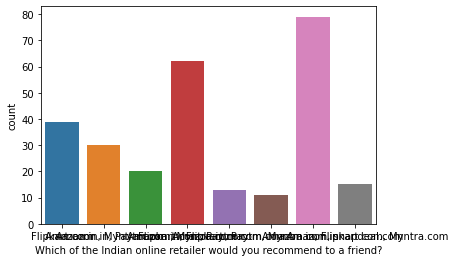

In [14]:
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'])
print(df["Which of the Indian online retailer would you recommend to a friend?"].value_counts())

BY ANALYSING THE TARGET IT IS CLEAR THAT THERE ARE 8 DIFFERENT VALUES
HERE Amazon.in IS THE MOST RECOMMENDED RETAILER WITH 79 COUNTS,,,
Amazon.in, Flipkart.com HAVE 62 COUNTS,,,
Flipkart.com HAS 39 COUNTS,,,
Amazon.in, Myntra.com HAS 30 COUNTS,,,
Amazon.in, Paytm.com, Myntra.com HAS 20 COUNTS,,,
Amazon.in, Flipkart.com, Myntra.com 15 COUNTS,,,
Amazon.in, Paytm.com HAS 13 COUNTS,,,,
THE LEAT VALUE COUNT HAS
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com IS 11


HERE WE PREFER CLASSIFICATION ALGORITHMS FOR ANALYSIS

# ANALYSING FEATURE VARIABLES

HERE GOING TO ANALYSE NOMINAL DATA BY COUNT PLOT

# UNIVARIATE ANALYSIS

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


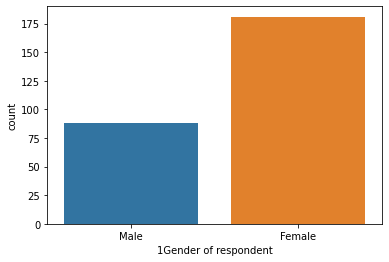

In [15]:
sns.countplot(df['1Gender of respondent'])
print(df["1Gender of respondent"].value_counts())

WE HAVE MORE FEMALE RESPONDENTS THAN MALE
FEMALE-181,,,,
MALE-88

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64


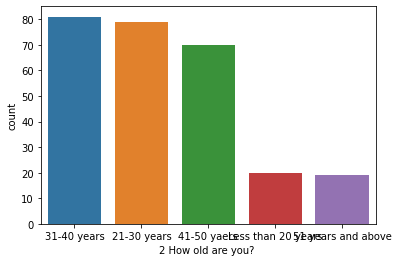

In [16]:
sns.countplot(df['2 How old are you? '])
print(df['2 How old are you? '].value_counts())

THE RESPONDENT WERE IN AN AGE GROUP OF 31-40,,,,LESS THAN 20 YEARS IS ONLY ONE COUNT MORE THE LEAST COUNT GROUP 51 YEARS AND ABOVE

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64


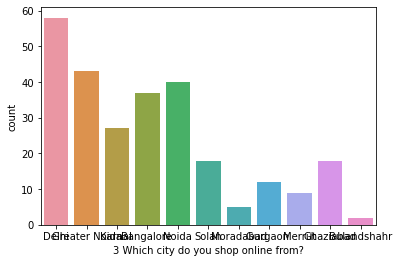

In [17]:
sns.countplot(df['3 Which city do you shop online from?'])
print(df["3 Which city do you shop online from?"].value_counts())

HERE MORE RESPONDENT ARE FROM DELHI,,,
GREAT NOIDA,NOIDA AND BANGLOOR HAVING ALMOST EQUAL RESPONDENTS,,,,
BULANDSHAHR HAVING LEAST NUMBER OF RESPONDENTS


201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
201009     5
201305     5
201312     5
244001     5
530068     5
201005     4
110009     4
110042     4
110039     4
110030     4
201304     4
122009     4
201303     4
560018     4
201001     4
560003     4
560002     4
560013     3
203001     2
203207     1
560001     1
203202     1
Name: 4 What is the Pin Code of where you shop online from?, dtype: int64


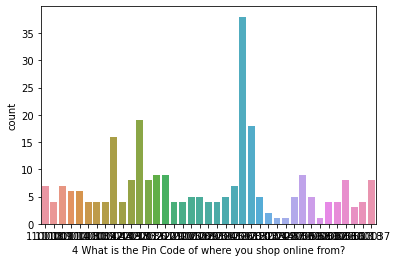

In [18]:
sns.countplot(df['4 What is the Pin Code of where you shop online from?'])
print(df["4 What is the Pin Code of where you shop online from?"].value_counts())

AROUND 40 DIFFERENT PINCODE LOCATIONS ARE HERE

BY ANALYSING ABOVE 4 COLUMN THOSE DATAS ARE NOTHING CONTRIBUTING TO TARGET,SO HERE GOING TO DROP THOSE COLUMNS

In [19]:
df.drop(["4 What is the Pin Code of where you shop online from?"],axis=1,inplace=True)

In [20]:
df.drop(['3 Which city do you shop online from?'],axis=1,inplace=True)

In [21]:
df.drop(['2 How old are you? '],axis=1,inplace=True)

In [22]:
df.drop(['1Gender of respondent'],axis=1,inplace=True)

In [23]:
df

,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64


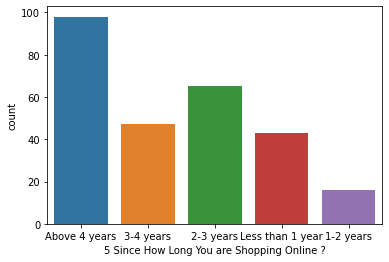

In [24]:
sns.countplot(df['5 Since How Long You are Shopping Online ?'])
print(df["5 Since How Long You are Shopping Online ?"].value_counts())

above 4 year long shopping online persons are more ,,,,
here 1-2 year long shopping customers are less comparing other age groups

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64


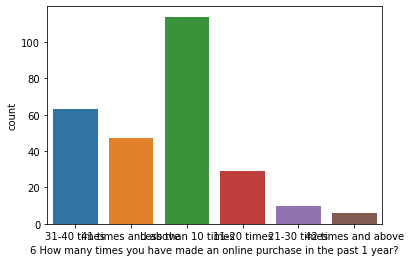

In [25]:
sns.countplot(df['6 How many times you have made an online purchase in the past 1 year?'])
print(df["6 How many times you have made an online purchase in the past 1 year?"].value_counts())

less than 10 times customers are more ,,,and online purchase above 42 times customemers are least 

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64


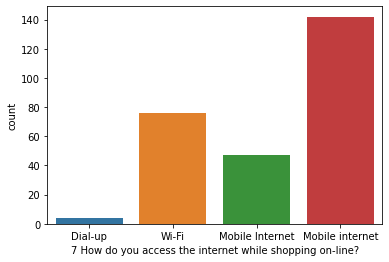

In [26]:
sns.countplot(df['7 How do you access the internet while shopping on-line?'])
print(df["7 How do you access the internet while shopping on-line?"].value_counts())

most of the customers are using mobile data ,,leat customers are using dial up connection,some errors are clear in this data, two mobile internets are there.so want to drop this column

In [27]:
df.drop(['7 How do you access the internet while shopping on-line?'],axis=1,inplace=True)

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64


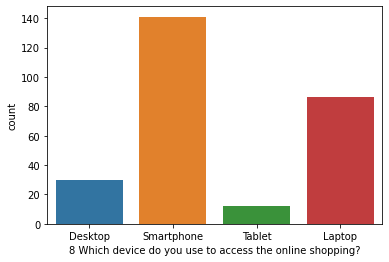

In [28]:
sns.countplot(df['8 Which device do you use to access the online shopping?'])
print(df["8 Which device do you use to access the online shopping?"].value_counts())

MOST OF THE PERSONS ARE USING SMARTPHONE FOR ONLINE PURCHASE, BUT THIS IS A UNWANTED DATA FOR OUR TARGET COLUMN

In [29]:
df.drop(['8 Which device do you use to access the online shopping?'],axis=1,inplace=True)

In [30]:
df

,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Above 4 years,31-40 times,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Ag

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        , dtype: int64


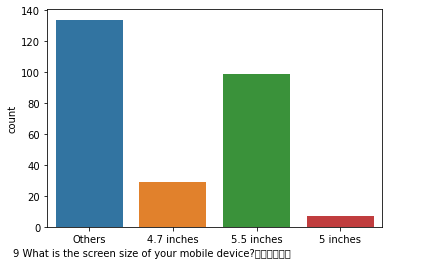

In [31]:
sns.countplot(df['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '])
print(df["9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        "].value_counts())

screen size of the device is clearly not effecting the target,so we can drop it

In [33]:
df.drop(['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '],axis=1,inplace=True)

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64


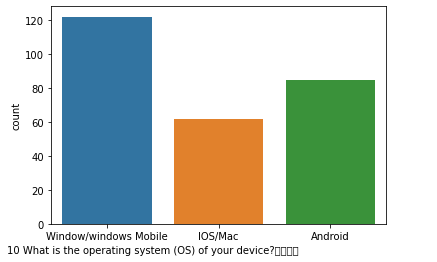

In [34]:
sns.countplot(df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '])
print(df["10 What is the operating system (OS) of your device?\t\t\t\t                                          "].value_counts())

MOST PEOPLE USING WINDOWS AND LEAST PEOPLE USING MAC

In [35]:
df.drop(['10 What is the operating system (OS) of your device?\t\t\t\t                                          '],axis=1,inplace=True)

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64


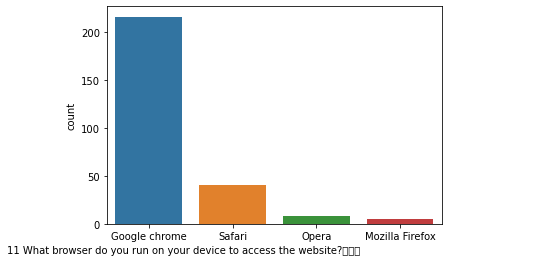

In [36]:
sns.countplot(df['11 What browser do you run on your device to access the website?\t\t\t                                                          '])
print(df["11 What browser do you run on your device to access the website?\t\t\t                                                          "].value_counts())

MOST OF THE PERSON USING GOOGLE CHROME FOR BROWSING.THIS COLUMN ALSO NOT AFFECTING TARGET SO DROP IT

BY analysing different columns from 11 to 17 it is clear that, those are the unwanted datas to our target, browsing details,channel,time of explore,payment option etc.so we are deleting those columns

In [37]:
df.drop(['11 What browser do you run on your device to access the website?\t\t\t                                                          '],axis=1,inplace=True)

In [38]:
df.drop(['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '],axis=1,inplace=True)

In [39]:
df.drop(['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '],axis=1,inplace=True)

In [40]:
df.drop(['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '],axis=1,inplace=True)

In [41]:
df.drop(['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '],axis=1,inplace=True)

In [42]:
df.drop(['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '],axis=1,inplace=True)

In [43]:
df.drop(['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '],axis=1,inplace=True)

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: 18 The content on the website must be easy to read and understand, dtype: int64


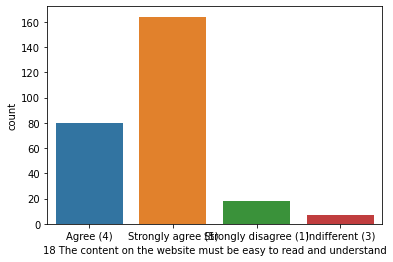

In [44]:
sns.countplot(df['18 The content on the website must be easy to read and understand'])
print(df["18 The content on the website must be easy to read and understand"].value_counts())

readability of website is an important factor,
most of the people strongly agree to this

Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64


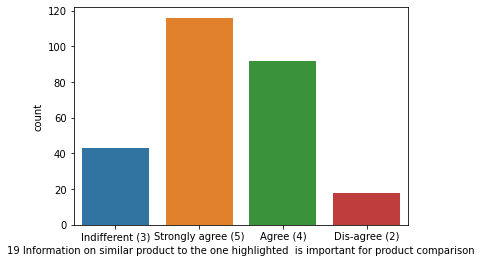

In [45]:
sns.countplot(df['19 Information on similar product to the one highlighted  is important for product comparison'])
print(df["19 Information on similar product to the one highlighted  is important for product comparison"].value_counts())

product comparison also one of the important parameter..
most of the persons strongly agreeing this

Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64


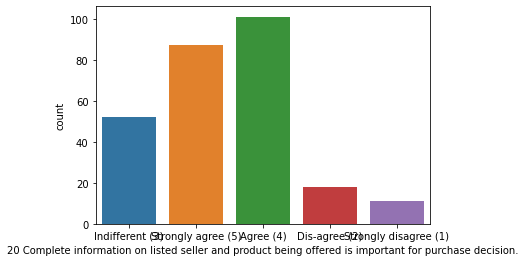

In [46]:
sns.countplot(df['20 Complete information on listed seller and product being offered is important for purchase decision.'])
print(df["20 Complete information on listed seller and product being offered is important for purchase decision."].value_counts())

information about the particular seller is a mandatory thing,, most of the people simply agreeing to this

Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64


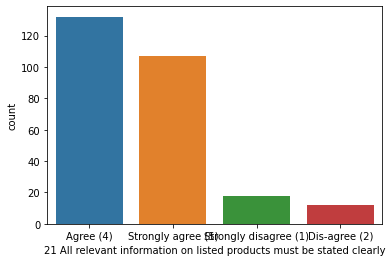

In [47]:
sns.countplot(df['21 All relevant information on listed products must be stated clearly'])
print(df['21 All relevant information on listed products must be stated clearly'].value_counts())

relevent info about the product is important ,people respond to it like the way
Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: 22 Ease of navigation in website, dtype: int64


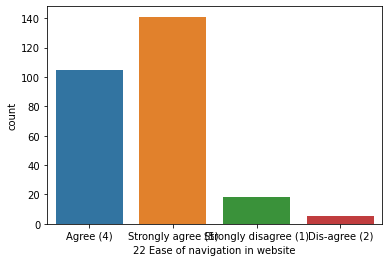

In [48]:
sns.countplot(df['22 Ease of navigation in website'])
print(df['22 Ease of navigation in website'].value_counts())

easiness to navigate in website is important large people strongly agree to this

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Indifferent (3)           12
Strongly disagree (1)     12
Name: 23 Loading and processing speed, dtype: int64


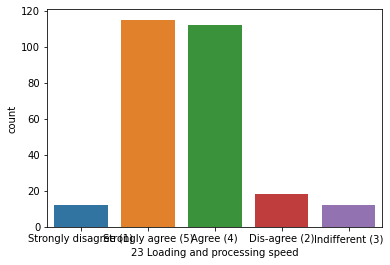

In [49]:
sns.countplot(df['23 Loading and processing speed'])
print(df['23 Loading and processing speed'].value_counts())

Loading aswellas processing speed of website is depanded by almost alll people

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: 24 User friendly Interface of the website, dtype: int64


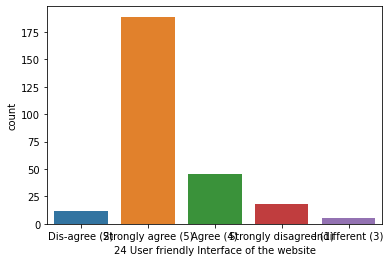

In [50]:
sns.countplot(df['24 User friendly Interface of the website'])
print(df['24 User friendly Interface of the website'].value_counts())

the website interface should be user friendly,,people respond to it like,,,Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: 25 Convenient Payment methods, dtype: int64


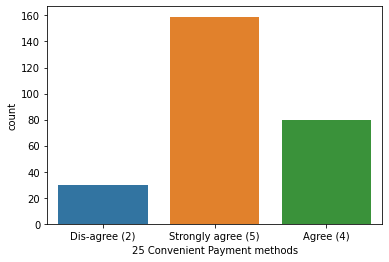

In [51]:
sns.countplot(df['25 Convenient Payment methods'])
print(df['25 Convenient Payment methods'].value_counts())

reliable and convenient payment method is mandatory

Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64


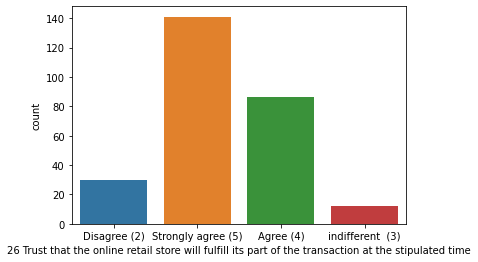

In [52]:
sns.countplot(df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'])
print(df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].value_counts())

timely transactions surely increases the trust of online retailer

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64


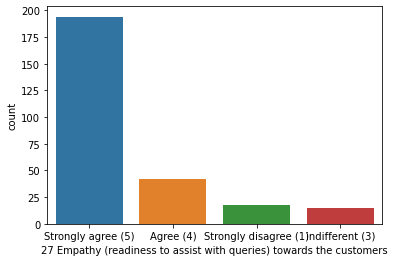

In [53]:
sns.countplot(df['27 Empathy (readiness to assist with queries) towards the customers'])
print(df['27 Empathy (readiness to assist with queries) towards the customers'].value_counts())

customers query should be handle with importance

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64


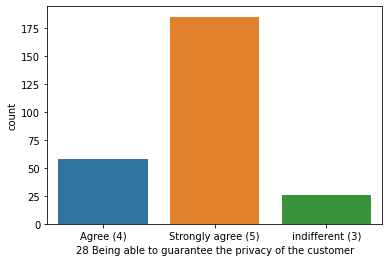

In [54]:
sns.countplot(df['28 Being able to guarantee the privacy of the customer'])
print(df['28 Being able to guarantee the privacy of the customer'].value_counts())

most customers prefers their privacy in purchase

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64


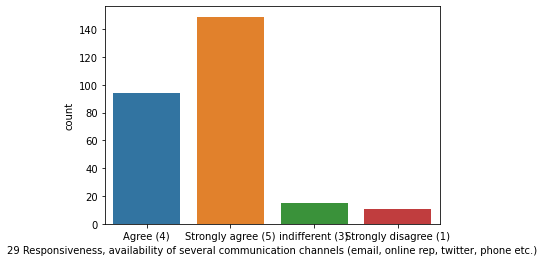

In [55]:
sns.countplot(df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'])
print(df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].value_counts())


most of the customers need proper responsiveness in different channel

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: 30 Online shopping gives monetary benefit and discounts, dtype: int64


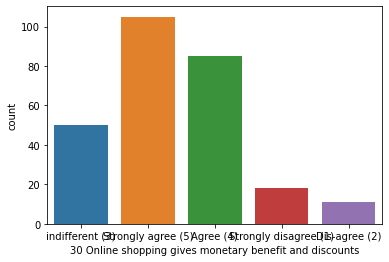

In [56]:
sns.countplot(df['30 Online shopping gives monetary benefit and discounts'])
print(df['30 Online shopping gives monetary benefit and discounts'].value_counts())

Discounts are one of the major attraction ,many people strongly or simply agree to this

Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: 31 Enjoyment is derived from shopping online, dtype: int64


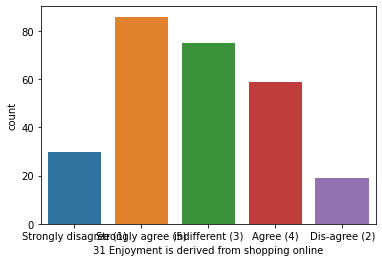

In [57]:
sns.countplot(df['31 Enjoyment is derived from shopping online'])
print(df['31 Enjoyment is derived from shopping online'].value_counts())

enjoyment factor in shopping online giving responce like..Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: 32 Shopping online is convenient and flexible, dtype: int64


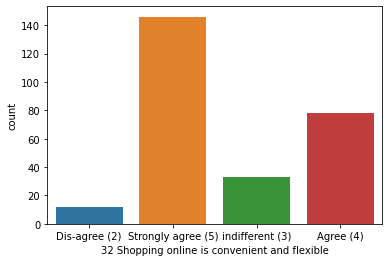

In [58]:
sns.countplot(df['32 Shopping online is convenient and flexible'])
print(df["32 Shopping online is convenient and flexible"].value_counts())

shopping online should be convenient and flexible

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64


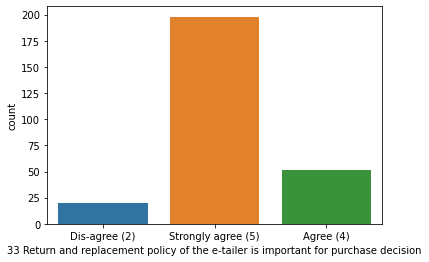

In [59]:
sns.countplot(df['33 Return and replacement policy of the e-tailer is important for purchase decision'])
print(df['33 Return and replacement policy of the e-tailer is important for purchase decision'].value_counts())

return and replacement policies should be transparent,,less than 10% is not agreeing to this

Strongly agree (5)       115
indifferent (3)           64
Agree (4)                 64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: int64


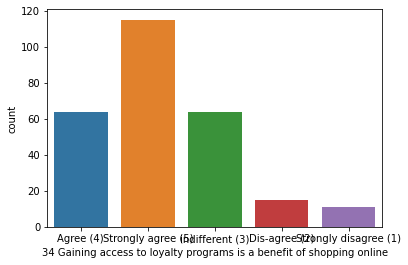

In [60]:
sns.countplot(df['34 Gaining access to loyalty programs is a benefit of shopping online'])
print(df['34 Gaining access to loyalty programs is a benefit of shopping online'].value_counts())

gaining access to loyalty program is good by the responce....Strongly agree (5)       115
indifferent (3)           64
Agree (4)                 64
Dis-agree (2)             15
Strongly disagree (1)     11

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: int64


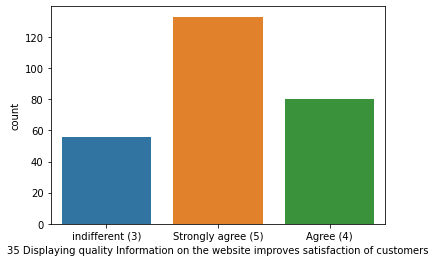

In [61]:
sns.countplot(df['35 Displaying quality Information on the website improves satisfaction of customers'])
print(df['35 Displaying quality Information on the website improves satisfaction of customers'].value_counts())

display of quality information surely increases the satisfaction,no one disagree to this

Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: int64


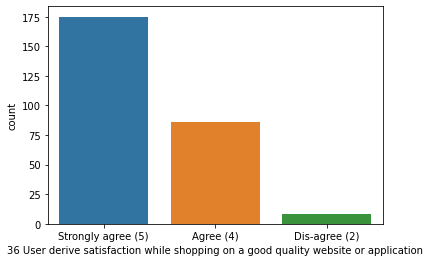

In [62]:
sns.countplot(df['36 User derive satisfaction while shopping on a good quality website or application'])
print(df['36 User derive satisfaction while shopping on a good quality website or application'].value_counts())

quality of website srongly needed by -175,agree-86,quality not wanted-only 8

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64


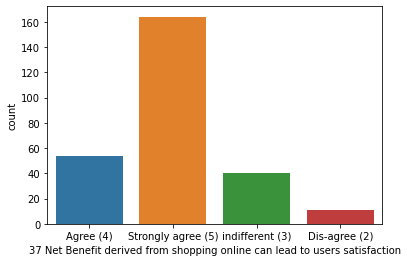

In [63]:
sns.countplot(df['37 Net Benefit derived from shopping online can lead to users satisfaction'])
print(df['37 Net Benefit derived from shopping online can lead to users satisfaction'].value_counts())

benifit driven from shopping is impotant,it is Strongly agree (5)    164,
Agree (4)              54,
indifferent (3)        40,
Dis-agree (2)          11

Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: 38 User satisfaction cannot exist without trust, dtype: int64


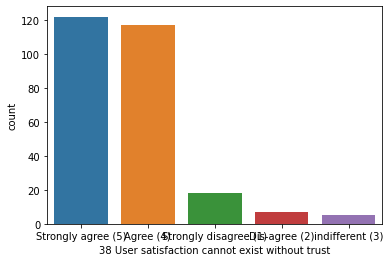

In [64]:
sns.countplot(df['38 User satisfaction cannot exist without trust'])
print(df['38 User satisfaction cannot exist without trust'].value_counts())

user satisfaction and trust are depending factors 122 persons sttrongly agree to this, only 7 is disaree to this

Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: 39 Offering a wide variety of listed product in several category, dtype: int64


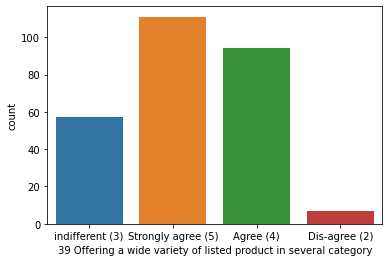

In [65]:
sns.countplot(df['39 Offering a wide variety of listed product in several category'])
print(df["39 Offering a wide variety of listed product in several category"].value_counts())

variety of product in different category is important

Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: 40 Provision of complete and relevant product information, dtype: int64


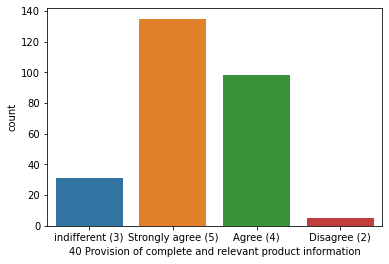

In [66]:
sns.countplot(df['40 Provision of complete and relevant product information'])
print(df['40 Provision of complete and relevant product information'].value_counts())

complete and relevent product information is needed for almost all customers

Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: 41 Monetary savings, dtype: int64


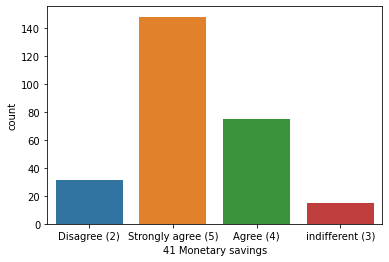

In [67]:
sns.countplot(df['41 Monetary savings'])
print(df["41 Monetary savings"].value_counts())

the monetary saving is Strongly agree-  148,,
Agree-  75,
Disagree- 31,
indifferent-15

Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: 42 The Convenience of patronizing the online retailer, dtype: int64


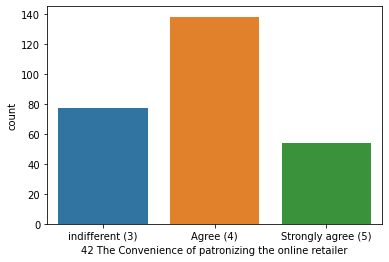

In [68]:
sns.countplot(df['42 The Convenience of patronizing the online retailer'])
print(df['42 The Convenience of patronizing the online retailer'].value_counts())

the responce against patronizing is Agreeto it is-138,,
indifferent-77,,,
Strongly agree-54

Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: 43 Shopping on the website gives you the sense of adventure, dtype: int64


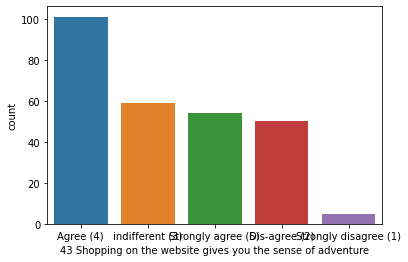

In [69]:
sns.countplot(df['43 Shopping on the website gives you the sense of adventure'])
print(df['43 Shopping on the website gives you the sense of adventure'].value_counts())

shopping relates to adventure only agree by 101,strongly agree by-54, disagree-50,srongly against-5

indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: 44 Shopping on your preferred e-tailer enhances your social status, dtype: int64


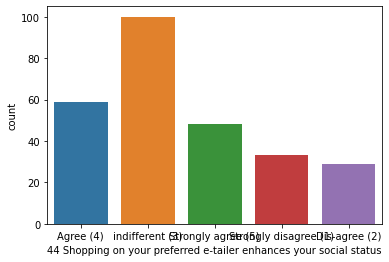

In [70]:
sns.countplot(df['44 Shopping on your preferred e-tailer enhances your social status'])
print(df['44 Shopping on your preferred e-tailer enhances your social status'].value_counts())

In [71]:
social status and shopping is finding indefferent ad-100,agree by-59, strongle agree-48,strongly disagree-33

SyntaxError: invalid syntax (<ipython-input-71-6e50097045a5>, line 1)

In [72]:
above two analysed columns are not mandatory for target adventure and social status so dropping both

SyntaxError: invalid syntax (<ipython-input-72-66e7effb7e5c>, line 1)

In [73]:
df.drop(['43 Shopping on the website gives you the sense of adventure'],axis=1,inplace=True)
df.drop(['44 Shopping on your preferred e-tailer enhances your social status'],axis=1,inplace=True)

indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: 45 You feel gratification shopping on your favorite e-tailer, dtype: int64


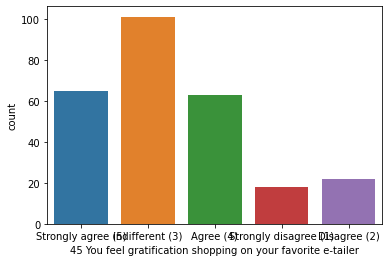

In [74]:
sns.countplot(df['45 You feel gratification shopping on your favorite e-tailer'])
print(df['45 You feel gratification shopping on your favorite e-tailer'].value_counts())

gratification relating to shopping responded by indefferent,.so it also dropping

In [75]:
df.drop(['45 You feel gratification shopping on your favorite e-tailer'],axis=1,inplace=True)

indifferent (3)          88
Agree (4)                88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: 46 Shopping on the website helps you fulfill certain roles, dtype: int64


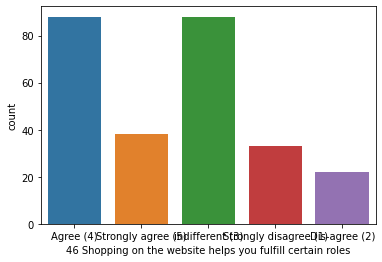

In [76]:
sns.countplot(df['46 Shopping on the website helps you fulfill certain roles'])
print(df["46 Shopping on the website helps you fulfill certain roles"].value_counts())

fullfilling any role relating to shopping question is indefferntly responded by 88, it is also agreed by same number-88

In [77]:
df.drop(['46 Shopping on the website helps you fulfill certain roles'],axis=1,inplace=True)

Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64


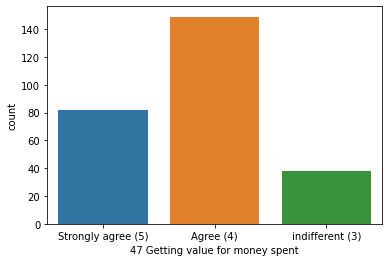

In [78]:
sns.countplot(df['47 Getting value for money spent'])
print(df['47 Getting value for money spent'].value_counts())

value for maney is an important parameter

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64


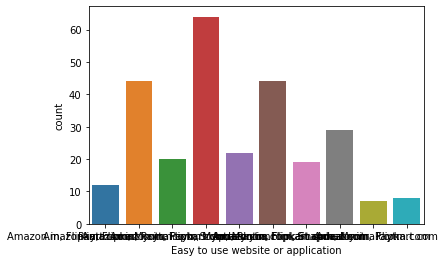

In [79]:
sns.countplot(df['Easy to use website or application'])
print(df['Easy to use website or application'].value_counts())

respondent selected different combinations

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Flipkart.com, Myntra.com                                        15
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64


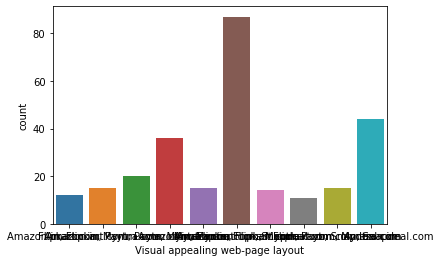

In [80]:
sns.countplot(df['Visual appealing web-page layout'])
print(df['Visual appealing web-page layout'].value_counts())

both amazon and flipkart having amazing visual appearence

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64


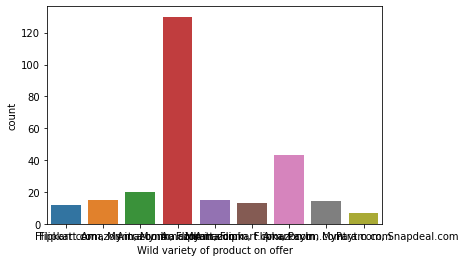

In [81]:
sns.countplot(df['Wild variety of product on offer'])
print(df['Wild variety of product on offer'].value_counts())

both amazon and flipkart selected most people,,, amazon got second position

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64


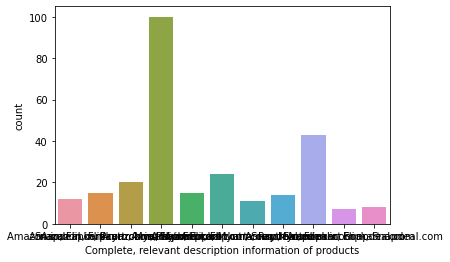

In [82]:
sns.countplot(df['Complete, relevant description information of products'])
print(df['Complete, relevant description information of products'].value_counts())

both amazon and flipkart opting ,,and amazon in second position,where flipkart singly hold second least position

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64


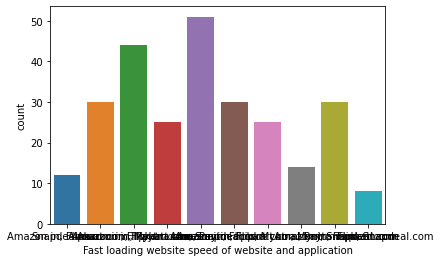

In [83]:
sns.countplot(df['Fast loading website speed of website and application'])
print(df['Fast loading website speed of website and application'].value_counts())

fastness in loading website amazon in first position

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64


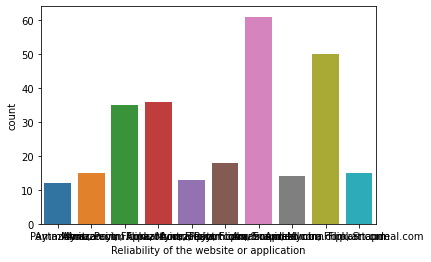

In [84]:
sns.countplot(df['Reliability of the website or application'])
print(df['Reliability of the website or application'].value_counts())

in reliability also amazon holding first position 

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64


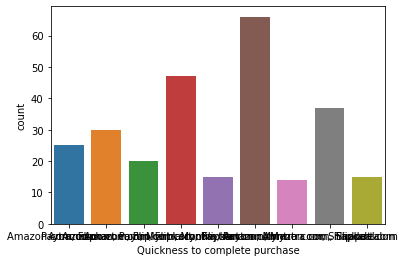

In [85]:
sns.countplot(df['Quickness to complete purchase'])
print(df['Quickness to complete purchase'].value_counts())

quickness in purchase, most people selected amazon

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64


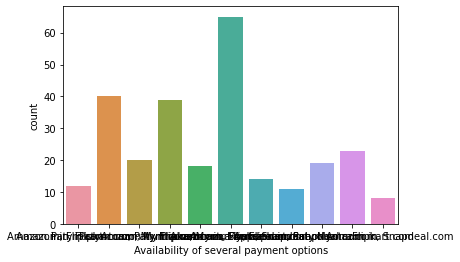

In [86]:
sns.countplot(df['Availability of several payment options'])
print(df['Availability of several payment options'].value_counts())

people selected different combination of sites in different payment modes

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Flipkart.com                               15
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery , dtype: int64


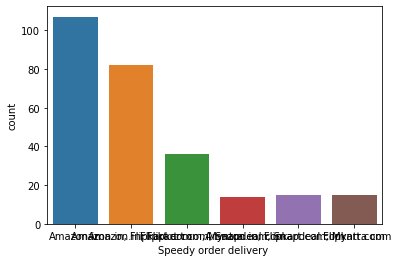

In [87]:
sns.countplot(df['Speedy order delivery '])
print(df['Speedy order delivery '].value_counts())

amaszon holding the prior position in speed delivery

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64


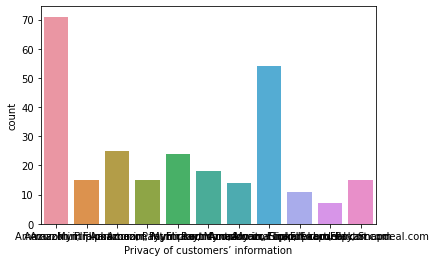

In [88]:
sns.countplot(df['Privacy of customers’ information'])
print(df['Privacy of customers’ information'].value_counts())

most people selected amazon in assuring privacy

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64


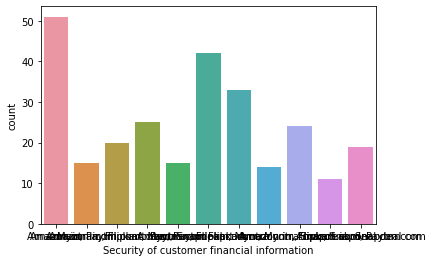

In [89]:
sns.countplot(df['Security of customer financial information'])
print(df['Security of customer financial information'].value_counts())

while cosideing the financial info of customers most people suggest amazon

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64


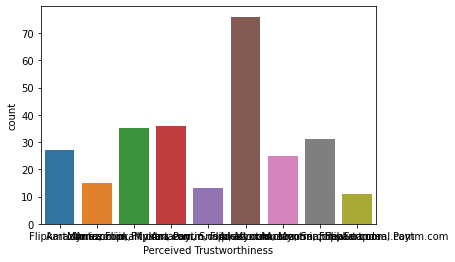

In [90]:
sns.countplot(df['Perceived Trustworthiness'])
print(df['Perceived Trustworthiness'].value_counts())

amazon holding first position in trustworthiness

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64


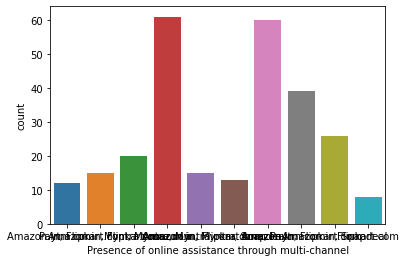

In [91]:
sns.countplot(df['Presence of online assistance through multi-channel'])
print(df['Presence of online assistance through multi-channel'].value_counts())

possibilities in online assistance,people prefer multiple sites,, amazon in second count

Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64


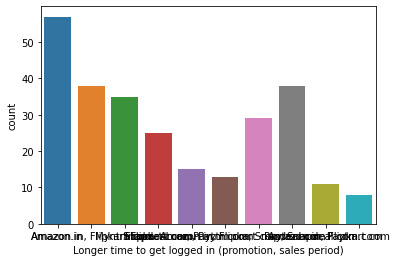

In [92]:
sns.countplot(df['Longer time to get logged in (promotion, sales period)'])
print(df['Longer time to get logged in (promotion, sales period)'].value_counts())

analysing longer log in amazon in first position

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Flipkart.com                           15
Paytm.com                              15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64


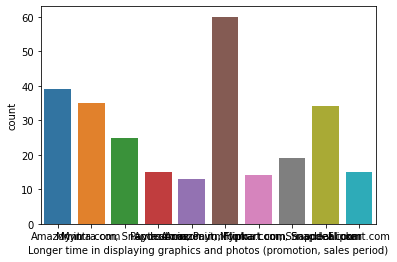

In [93]:
sns.countplot(df['Longer time in displaying graphics and photos (promotion, sales period)'])
print(df['Longer time in displaying graphics and photos (promotion, sales period)'].value_counts())

long time display of advertising components people suggesting amazon and flipkart

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64


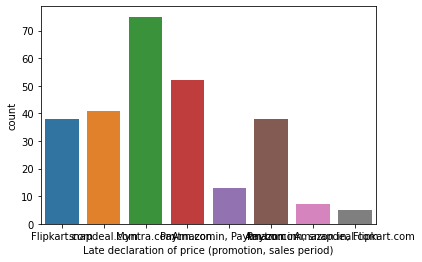

In [94]:
sns.countplot(df['Late declaration of price (promotion, sales period)'])
print(df['Late declaration of price (promotion, sales period)'].value_counts())

late declaration of product is negatively affect the target

In [95]:
df.drop(['Late declaration of price (promotion, sales period)'],axis=1,inplace=True)

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64


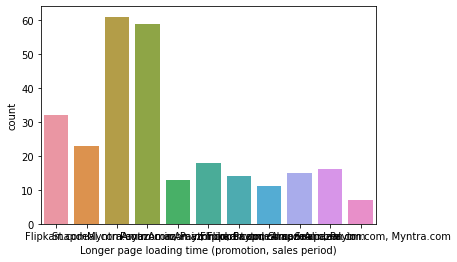

In [96]:
sns.countplot(df['Longer page loading time (promotion, sales period)'])
print(df['Longer page loading time (promotion, sales period)'].value_counts())

longer page loading time also negatinvely affecting

In [97]:
df.drop(['Longer page loading time (promotion, sales period)'],axis=1,inplace=True)

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64


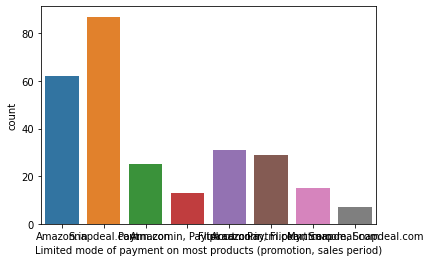

In [98]:
sns.countplot(df['Limited mode of payment on most products (promotion, sales period)'])
print(df['Limited mode of payment on most products (promotion, sales period)'].value_counts())

snapdeal having least mode of payment,, it also affecting target

In [99]:
df.drop(['Limited mode of payment on most products (promotion, sales period)'],axis=1,inplace=True)

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Myntra.com                 26
Paytm.com, Snapdeal.com    26
Name: Longer delivery period, dtype: int64


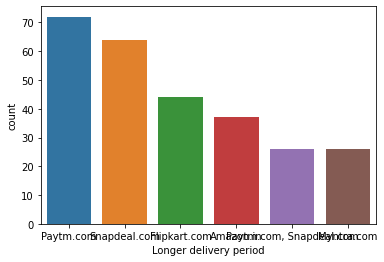

In [100]:
sns.countplot(df['Longer delivery period'])
print(df['Longer delivery period'].value_counts())

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64


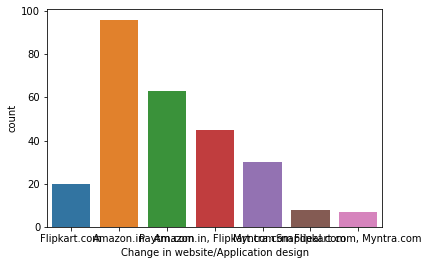

In [101]:
sns.countplot(df['Change in website/Application design'])
print(df['Change in website/Application design'].value_counts())

change in design of site mostly by amazon

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64


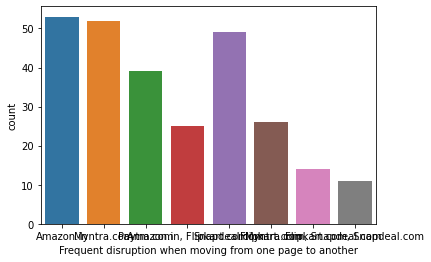

In [102]:
sns.countplot(df['Frequent disruption when moving from one page to another'])
print(df['Frequent disruption when moving from one page to another'].value_counts())

in frequent distribution while page moving also mostly by amazon

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64


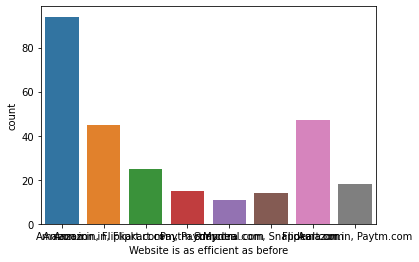

In [103]:
sns.countplot(df['Website is as efficient as before'])
print(df['Website is as efficient as before'].value_counts())

in efficiency,,count of amazon is leading

In [104]:
df

,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Above 4 years,31-40 times,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Above 4 years,41 times and above,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.c

In [105]:
df.shape

(269, 49)

FOR ANALYSING DATA WE HAVE TO ENCODE THE DATA, THEN ONLY WE CAN ANALYSE THE DISCRIPTION AND CORELATION OF DATAS

# ENCODING

In [106]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
en=OrdinalEncoder()
sc_X=StandardScaler()

In [107]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))

In [108]:
df

,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,3.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,3.0,3.0,1.0,2.0,1.0,7.0,9.0,7.0,5.0,10.0,9.0,9.0,8.0,9.0,0.0,0.0,0.0,7.0,9.0,0.0,0.0,3.0,2.0,0.0,0.0,6.0
1,3.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,6.0,2.0,2.0,8.0,2.0,2.0,1.0,9.0,9.0,8.0,2.0,1.0,6.0,5.0,0.0,4.0,1.0,3.0
2,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,8.0,7.0,6.0,4.0,7.0,7.0,6.0,5.0,10.0,0.0,0.0,6.0,6.0,8.0,7.0,6.0,3.0,5.0,6.0,0.0,5.0
3,2.0,5.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,4.0,3.0,0.0,4.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,4.0,3.0,1.0,1.0,6.0,3.0,3.0,2.0,3.0,2.0,5.0,5.0,3.0,9.0,7.0,3.0,1.0,1.0,2.0,1.0
4,1.0,0.0,2.0,2.0,2.0,0.0,0.0,3.0,3.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,4.0,4.0,9.0,7.0,5.0,0.0,6.0,4.0,4.0,0.0,7.0,10.0,6.0,5.0,5.0,8.0,3.0,0.0,7.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,1.0,4.0,2.0,1.0,3.0,0.0,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,

In [109]:
cor=df.corr()

In [110]:
cor

,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
5 Since How Long You are Shopping Online ?,1.000000,0.013315,-0.053881,0.104445,-0.004843,0.136849,0.086267,0.137538,0.068352,-0.150408,0.207633,-0.013947,0.007825,0.034005,-0.118279,-0.042992,-0.291088,0.093789,-0.048597,-0.140201,-0.132350,-0.038078,-0.067472,0.017923,-0.107363,-0.057603,0.035618,-0.262638,0.133673,0.049813,-0.038449,0.026506,0.018533,0.065602,0.024719,-0.052173,-0.041881,-0.093646,0.012681,-0.009494,-0.034858,0.021904,0.154763,-0.063386,0.218641,0.220347,0.025919,-0.024316,0.136106
6 How many times you have made an online purchase in the past 1 year?,0.013315,1.000000,-0.139930,-0.107277,-0.147507,-0.100875,0.078981,-0.261066,0.013640,-0.052107,0.049143,0.075615,0.135745,-0.190372,-0.159635,0.043482,0.004376,-0.310908,0.036268,0.056794,-0.226581,0.112002,-0.206904,0.144087,-0.144277,-0.021391,0.105267,-0.087458,-0.068387,-0.160976,-0.223378,-0.177938,-0.195169,0.015289,-0.146351,-0.107802,-0.097651,0.101356,-0.164571,-0.192403,-0.169235,-0.058209,0.062336,-0.096575,-0.130651,0.007841,-0.127148,-0.124076,-0.152028
18 The content on the website must be easy to read and understand,-0.053881,-0.139930,1.000000,0.244723,0.234382,0.672833,0.203138,0.038000,0.403252,0.364542,0.259681,0.311905,0.498174,0.494725,0.322762,-0.036408,0.062508,0.439266,-0.080413,-0.140278,0.633997,-0.133452,0.

In [111]:
import matplotlib.pyplot as plt

<AxesSubplot:>

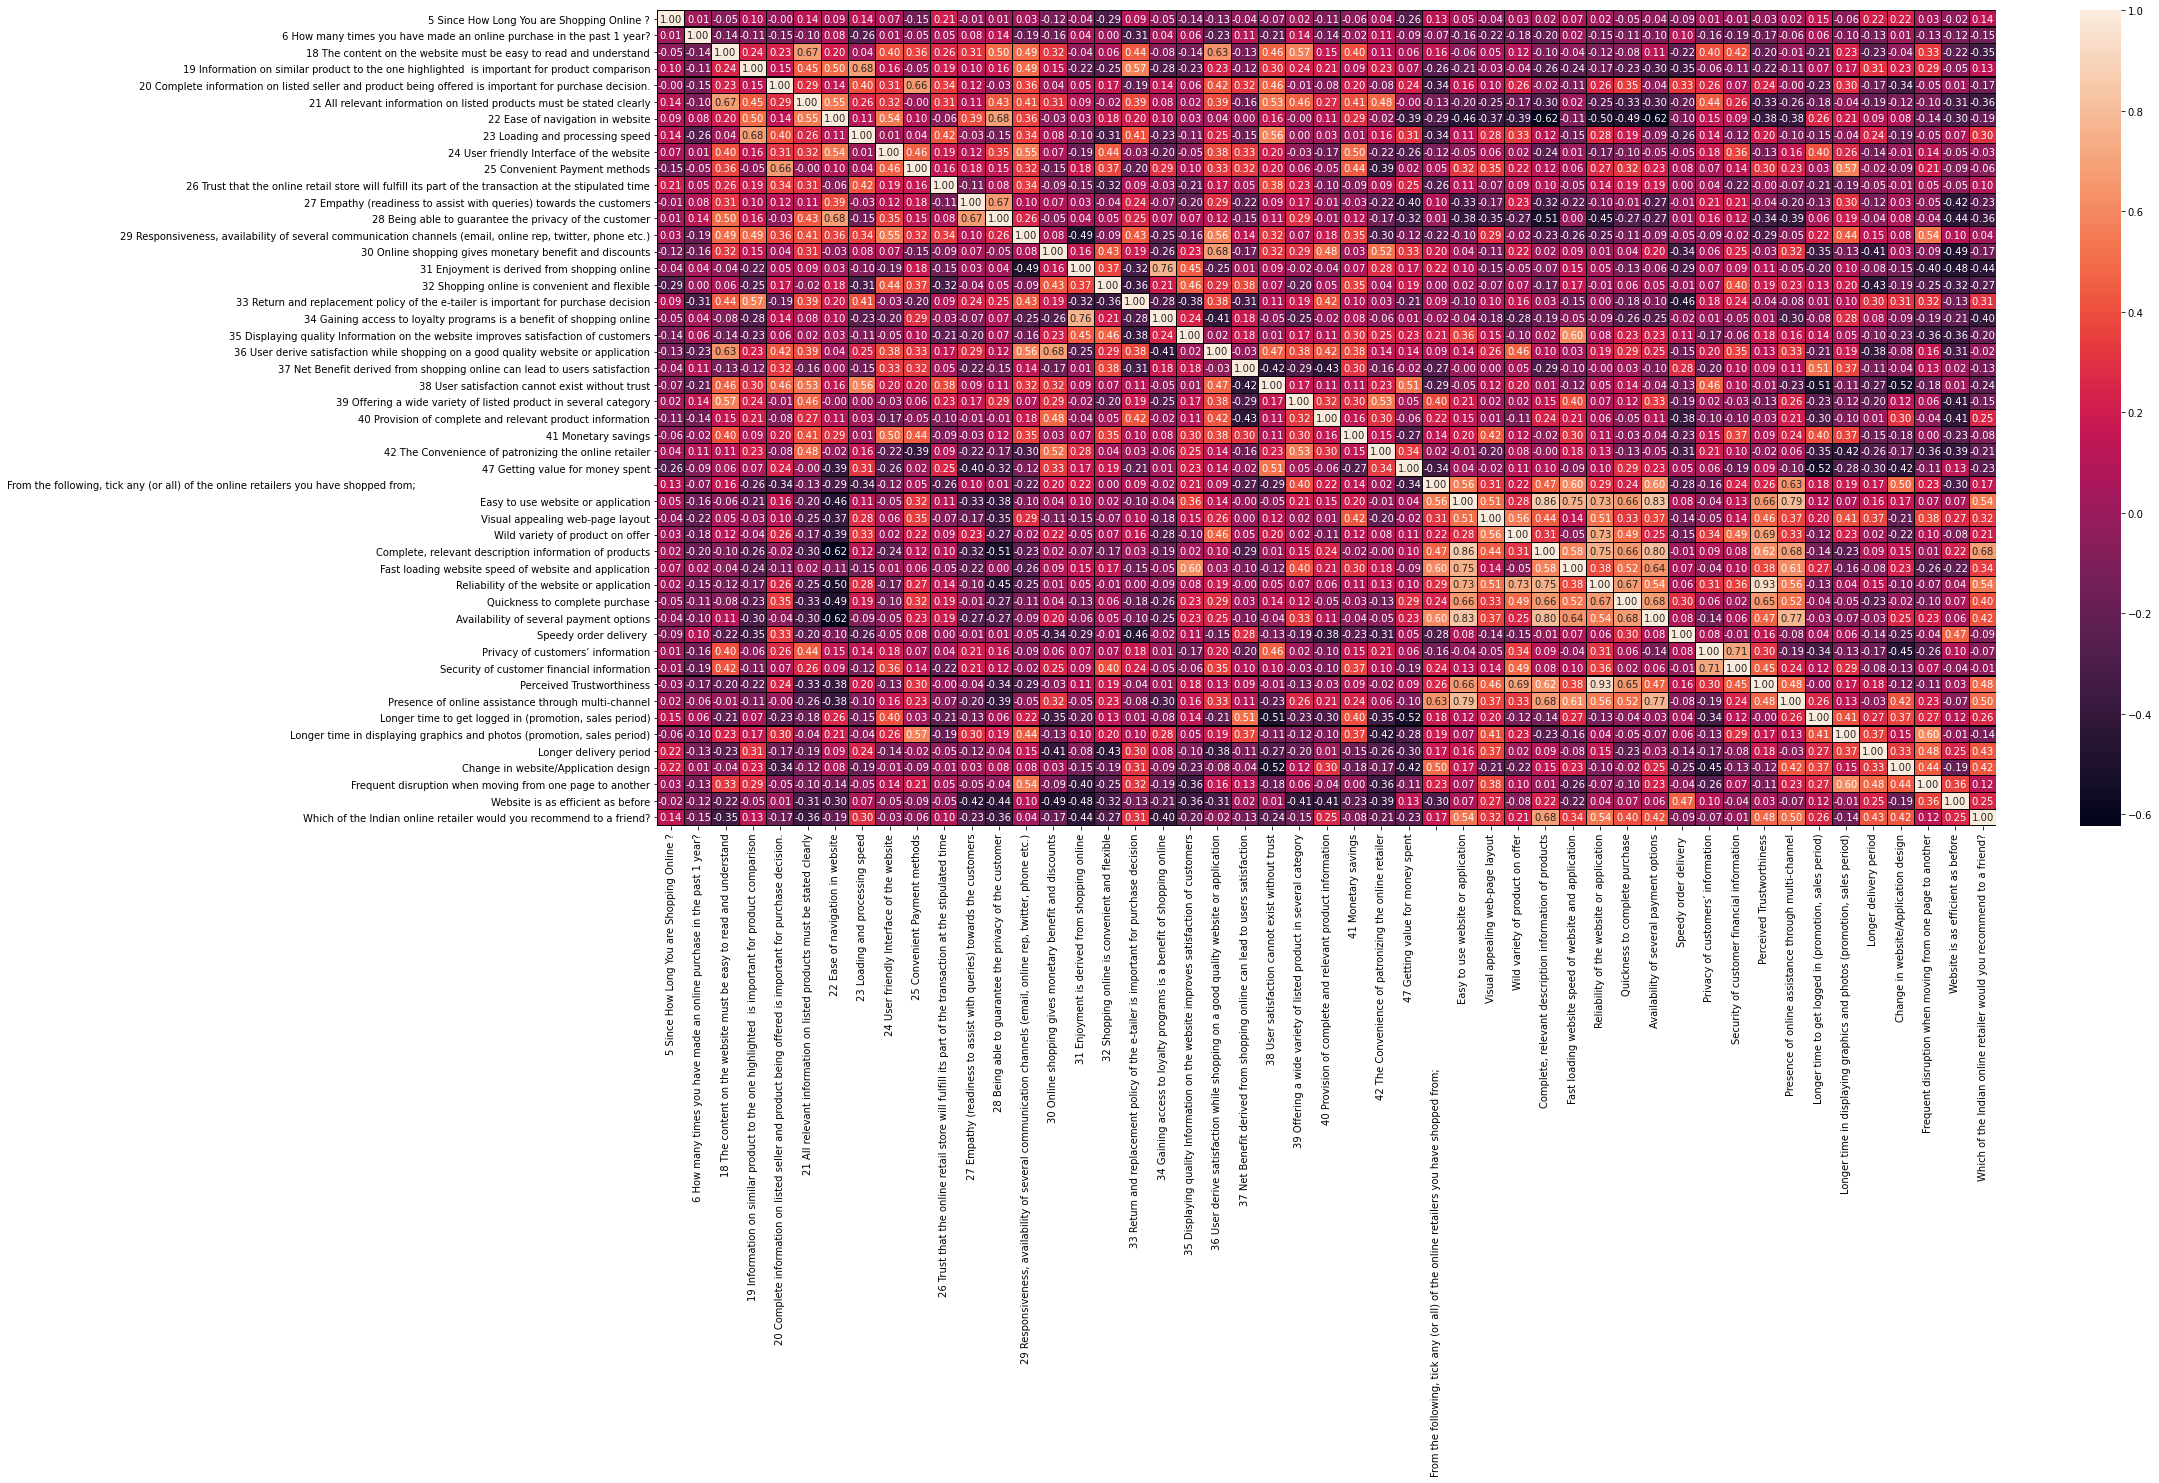

In [112]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")


In [113]:
df.describe()

,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,2.323420,3.237918,1.446097,1.680297,1.587361,1.040892,1.267658,1.617100,2.457249,1.293680,1.293680,1.022305,0.881041,0.802974,1.765799,2.159851,1.498141,1.546468,1.985130,0.910781,1.330855,1.706320,1.208178,1.486989,1.368030,1.382900,0.773234,0.587361,3.791822,3.472119,2.977695,2.185874,3.003717,3.762082,3.237918,2.921933,3.680297,1.301115,3.315985,4.386617,3.215613,3.193309,4.044610,4.063197,2.736059,2.189591,3.587361,2.133829,2.397770
std,1.176357,1.739331,0.989626,1.330618,1.375691,1.076461,1.055774,1.483191,1.216734,0.897341,0.969304,0.668776,0.547018,0.759413,1.438082,1.468737,1.038888,0.793324,1.416771,0.706734,0.929520,0.953781,1.133516,1.173724,1.093681,0.953316,0.866386,0.725847,2.185725,2.415004,2.809808,2.253278,3.025388,2.838155,2.861722,2.626899,3.

the correlation shoeing the multi collinearitty so we ant to apply VIF for multicollinearity

# MULTICOLLINEARITY-VIF

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

WE HAVE TO SPLIT THE DATA FIRST

In [116]:
 x=df.iloc[:,0:-1]

In [118]:
x

,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before
0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,3.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,3.0,3.0,1.0,2.0,1.0,7.0,9.0,7.0,5.0,10.0,9.0,9.0,8.0,9.0,0.0,0.0,0.0,7.0,9.0,0.0,0.0,3.0,2.0,0.0,0.0
1,3.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,6.0,2.0,2.0,8.0,2.0,2.0,1.0,9.0,9.0,8.0,2.0,1.0,6.0,5.0,0.0,4.0,1.0
2,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,8.0,7.0,6.0,4.0,7.0,7.0,6.0,5.0,10.0,0.0,0.0,6.0,6.0,8.0,7.0,6.0,3.0,5.0,6.0,0.0
3,2.0,5.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,4.0,3.0,0.0,4.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,4.0,3.0,1.0,1.0,6.0,3.0,3.0,2.0,3.0,2.0,5.0,5.0,3.0,9.0,7.0,3.0,1.0,1.0,2.0
4,1.0,0.0,2.0,2.0,2.0,0.0,0.0,3.0,3.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,4.0,4.0,9.0,7.0,5.0,0.0,6.0,4.0,4.0,0.0,7.0,10.0,6.0,5.0,5.0,8.0,3.0,0.0,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,1.0,4.0,2.0,1.0,3.0,0.0,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,0.0,2.0,2.0,3.0,3.0,2

In [119]:
y=df.iloc[:,-1]

In [120]:
y

0      6.0
1      3.0
2      5.0
3      1.0
4      3.0
      ... 
264    0.0
265    6.0
266    0.0
267    0.0
268    0.0
Name: Which of the Indian online retailer would you recommend to a friend?, Length: 269, dtype: float64

In [121]:
x.shape

(269, 48)

In [122]:
y.shape

(269,)

DEFINING FUNCTION FOR VIF

In [123]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [124]:
vif_calc()

    VIF Factor                                           Features
0     1.518062         5 Since How Long You are Shopping Online ?
1     1.541668  6 How many times you have made an online purch...
2          inf  18 The content on the website must be easy to ...
3          inf  19 Information on similar product to the one h...
4          inf  20 Complete information on listed seller and p...
5          inf  21 All relevant information on listed products...
6          inf                   22 Ease of navigation in website
7          inf                    23 Loading and processing speed
8          inf          24 User friendly Interface of the website
9          inf                      25 Convenient Payment methods
10         inf  26 Trust that the online retail store will ful...
11         inf  27 Empathy (readiness to assist with queries) ...
12         inf  28 Being able to guarantee the privacy of the ...
13         inf  29 Responsiveness, availability of several com...
14        

VIF SHOWING PERFECT CORRELATION

# scaling feature columns

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
sc=StandardScaler()

In [127]:
x=sc.fit_transform(x)

In [128]:
x

array([[ 0.57622065, -0.71304739, -1.46397934, ..., -0.08825722,
        -1.40519246, -0.98469733],
       [ 0.57622065, -0.13704214,  0.56075301, ..., -1.0192844 ,
         0.16163354, -0.52322768],
       [-0.27544613, -0.13704214,  0.56075301, ...,  1.30828355,
         0.94504654, -0.98469733],
       ...,
       [-1.12711291,  1.01496835,  0.56075301, ...,  1.77379714,
         1.33675303, -0.98469733],
       [-1.12711291,  1.01496835,  0.56075301, ..., -1.0192844 ,
         0.55334004,  1.32265095],
       [-1.12711291, -0.71304739,  0.56075301, ..., -1.0192844 ,
        -1.40519246, -0.98469733]])

In [131]:
y.unique

<bound method Series.unique of 0      6.0
1      3.0
2      5.0
3      1.0
4      3.0
      ... 
264    0.0
265    6.0
266    0.0
267    0.0
268    0.0
Name: Which of the Indian online retailer would you recommend to a friend?, Length: 269, dtype: float64>

In [133]:
print(y.value_counts())

0.0    79
1.0    62
6.0    39
3.0    30
5.0    20
2.0    15
4.0    13
7.0    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


target has 8 classes but we want to balance it using up sampling or down sampling

# SAMPLING

here using SMOTE

In [134]:
from imblearn.over_sampling import SMOTE

In [135]:
sm=SMOTE()

In [136]:
x,y=sm.fit_resample(x,y)

In [138]:
y

0      6.0
1      3.0
2      5.0
3      1.0
4      3.0
      ... 
627    7.0
628    7.0
629    7.0
630    7.0
631    7.0
Name: Which of the Indian online retailer would you recommend to a friend?, Length: 632, dtype: float64

In [ ]:
now x,and y are perfectly ready for further operations